## Workflow to analyze Photometry data

### Imports

In [1]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *

### Variables

In [12]:
import pandas as pd


# time limit around trigger to perform an event
# determine successful trials
timelim = [0, 4000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

# if in non canonical, go upper in folder tree one additional level
basefolder, _ = os.path.split(os.getcwd())
basefolder, _ = os.path.split(basefolder)

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = os.path.join(basefolder,r'params\tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

photometry_dir = r'T:\Data\head-fixed\pyphotometry\data\go_rewarding_aversive'
video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'

### Tasks
- A tasks definition file (.csv) contains all the information to perform the extractions of behaviorally relevant information from **PyControl** files, for each **task** file. It includes what are the **triggers** of different trial types, what **events** to extract (with time data), and what are events or printed lines that could be relevant to determine the **conditions** (e.g: free reward, optogenetic stimulation type, etc.)
- To analyze a new task you need to append task characteristics like **task** filename, **triggers**, **events** and **conditions**

In [14]:
tasks = pd.read_csv(tasksfile, usecols = [1,2,3,4], index_col = False)
tasks

,task,triggers,events,conditions
0,lick_go_nogo,go; nogo,bar; bar_off; spout,free_reward
1,lick_go_nogo_unconditionned,go; nogo,bar; bar_off; spout,free_reward
2,lick_go_nogo_unconditionned_opto,go; nogo,bar; bar_off; spout,free_reward
3,reaching_go_nogo,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
4,reaching_go_nogo_jc,CS_plus; CS_minus,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
5,reaching_go_nogo_opto_continuous,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset; s_go_sham; s_go_...
6,reaching_go_nogo_opto_sinusoid,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
7,reaching_go_nogo_opto_sinusoid_spout,CS_Go; CS_NoGo,bar; bar_off; spout,s_nogo_sham; s_nogo_cs_onset_2; s_nogo_cs_onse...
8,reaching_go_nogo_reversal,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...
9,reaching_go_nogo_reversal_incentive,CS_Go; CS_NoGo,bar; bar_off; spout,error bar_off; reward bar_off; error free; rew...


### Optional

Transfer Files from hierarchical folders by tasks to flat folders, for photometry and behaviour files

In [58]:
# photo_root_dir = 'T:\\Data\\head-fixed\\pyphotometry\\data'
# pycontrol_root_dir = 'T:\\Data\\head-fixed\\pycontrol'

# root_folders = [photo_root_dir, pycontrol_root_dir]
# horizontal_folder_pycontrol = 'T:\\Data\\head-fixed\\test_folder\\pycontrol'
# horizontal_folder_photometry = 'T:\\Data\\head-fixed\\test_folder\\photometry'

# copy_files_to_horizontal_folders(root_folders, horizontal_folder_pycontrol, horizontal_folder_photometry)

### Create an experiment object

This will include all the pycontrol files present in the folder_path directory (do not include subdirectories)

In [15]:
# Folder of a full experimental batch, all animals included

# Enter absolute path like this
pycontrol_files_path = r'T:\Data\head-fixed\pycontrol\go_rewarding_aversive'

# or this if you want to use data from the sample_data folder within the package
# pycontrol_files_path = os.path.join(basefolder,'sample_data/pycontrol')
# pycontrol_files_path = r'T:\Data\head-fixed\kms_pycontrol'

# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(pycontrol_files_path, update=True, verbose=True)

# Only use if the Experiment cohort as been processed by trials before
# TODO: assess whether this can be removed or not
exp_cohort.by_trial = True

Saved sessions loaded from: sessions.pkl
Loading new data files..
session nb:  1 0 2022-10-12 10:52:02 go_rewarding_aversive
session nb:  2 0 2022-10-12 10:52:56 go_rewarding_aversive
session nb:  3 0 2022-10-12 10:59:30 go_rewarding_aversive
session nb:  4 0 2022-10-12 11:04:49 go_rewarding_aversive
session nb:  5 0 2022-10-12 11:14:41 go_rewarding_aversive
session nb:  6 0 2022-10-12 11:19:45 go_rewarding_aversive
session nb:  7 0 2022-10-12 11:21:26 go_rewarding_aversive
session nb:  8 0 2022-10-12 11:21:57 go_rewarding_aversive
session nb:  9 0 2022-10-12 11:28:43 go_rewarding_aversive
session nb:  10 0 2022-10-12 11:30:29 go_rewarding_aversive
session nb:  11 0 2022-10-12 11:37:55 go_rewarding_aversive
session nb:  12 0 2022-10-12 11:38:41 go_rewarding_aversive
session nb:  13 0 2022-10-12 11:41:19 go_rewarding_aversive
session nb:  14 0 2022-10-12 11:44:59 go_rewarding_aversive
session nb:  15 0 2022-10-14 11:17:41 go_rewarding_aversive
session nb:  16 0 2022-10-25 16:39:31 go_re

### Perform extraction of behavioural information by trial

In [16]:
# Process the whole experimental folder by trials
trial_window = [-2000, 6000]
exp_cohort.process_exp_by_trial(trial_window, timelim, tasksfile, blank_spurious_event='spout', blank_timelim=[0, 65])

# Save the file as sessions.pkl in folder_path
exp_cohort.save()

file too short to process (likely aborted session):                 0 2022-10-12 10:52:02 go_rewarding_aversive
file too short to process (likely aborted session):                 1 2022-10-12 10:52:02 go_rewarding_aversive
No event  'bar'  found:  1 2022-10-12 10:59:30 go_rewarding_aversive
No event  'bar_off'  found:  1 2022-10-12 10:59:30 go_rewarding_aversive
No event  'spout'  found:  1 2022-10-12 10:59:30 go_rewarding_aversive
No event  'bar'  found:  1 2022-10-12 11:04:49 go_rewarding_aversive
No event  'bar_off'  found:  1 2022-10-12 11:04:49 go_rewarding_aversive
file too short to process (likely aborted session):                 0 2022-10-12 11:14:41 go_rewarding_aversive
file too short to process (likely aborted session):                 1 2022-10-12 11:14:41 go_rewarding_aversive
file too short to process (likely aborted session):                 0 2022-10-12 11:19:45 go_rewarding_aversive
file too short to process (likely aborted session):                 0 2022-10-12 11:2

### Match with photometry, videos, and DeepLabCut files

The following Warning : 

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads...

is due to rsync function for photometry-pycontrol alignment


In [17]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)

# Find matching videos
exp_cohort.match_sessions_to_files(video_dir, ext='mp4')

# Find matching DeepLabCut outputs files
exp_cohort.match_sessions_to_files(video_dir, ext='h5')

exp_cohort.save()

saved T:\Data\head-fixed\pycontrol\go_rewarding_aversive\sessions.pkl


In [19]:
len(exp_cohort.sessions)

25

### Define conditions and groups for extraction

In [28]:
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'Go_water', 'valid': True, 'Go_water spout success': True}
conditions_dict2 = {'trigger': 'Go_air', 'valid': True, 'Go_air spout success': True}

conditions_dict3 = {'trigger': 'Go_water', 'valid': True, 'Go_water bar success': True}
conditions_dict4 = {'trigger': 'Go_air', 'valid': True, 'Go_air bar success': True}




# Aggregate all condition dictionaries in a list
condition_list = [
    conditions_dict1, 
    conditions_dict2, 
    conditions_dict3, 
    conditions_dict4    
    ]
    
# Aliases for conditions
cond_aliases = [
    'Go_water spout - hit',
    'Go_air spout - hit',

    'Go_water bar - hit', 
    'Go_air bar - hit'
    ]
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]


### Limit the Experiment group by only including a subset of sessions in a copied object

In [23]:
from copy import deepcopy
exp_cohort_subset = deepcopy(exp_cohort)

# Take only sessions where the task is 'reaching_go_nogo' and which have matching photometry files
exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'go_rewarding_aversive') 
    and (session.subject_ID == 47)
    and (session.photometry_rsync is not None)
]#and (session.subject_ID == 296)]

exp_cohort_subset.by_trial = True
exp_cohort_subset.trial_window = [-2000, 6000]
print(len(exp_cohort_subset.sessions))

3


In [24]:
exp_cohort_subset.sessions[-1].plot_trials_events(['bar_off','spout'])

### Extract Photometry trials and create a Continuous_Dataset

In [29]:
cont_dataset = exp_cohort_subset.get_photometry_groups(
        groups = None, # or use groups variable defined above
        conditions_list = condition_list, 
        cond_aliases = cond_aliases, 
        when = 'all', 
        task_names = 'go_rewarding_aversive', #'reaching_go_nogo',
        trig_on_ev = None, # align to the first event of a kind e.g. bar_off
        high_pass = None, 
        low_pass = 45, 
        median_filt = 3,
        motion_corr = True, 
        df_over_f = True, 
        downsampling_factor = 10, 
        export_vars = ['analog_1_df_over_f'], 
        remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
        verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True

cont_dataset.set_trial_window([-2000, 6000], 'ms')


### Save Photometry Dataset

In [31]:
folder_path = r'C:\Users\phar0732\Documents\GitHub\pycontrol_share\outputs'
cont_dataset.save(folder_path, 'photo_go_rewarding_aversive_47_mf3_lp45_CS_onset')

Dataset saved in C:\Users\phar0732\Documents\GitHub\pycontrol_share\outputs\photo_go_rewarding_aversive_47_mf3_lp45_CS_onset.pkl
data size is 1.1353836059570312 Mb


### Reload a pre-existing dataset

In [67]:
dataset_full_path = r'C:\Users\phar0732\Documents\GitHub\pycontrol_share\outputs\photo_cued_uncued_oct22_47_mf3_lp45_spout.pkl'
cont_dataset = load_dataset(dataset_full_path)

### Cluster trials to exclude artifacts

### Plot the different clusters of trials

### Optional methods

In [68]:
# Get a list of the groups
cont_dataset.get_groups()
# Get a list of the variables
cont_dataset.get_col_names()

# reset previous filtering of the dataset
cont_dataset.filter_reset()

# exclude some conditions by IDs
# cont_dataset.filterout_conditions([1,3,4,5,6,7,8])
cont_dataset.filterout_conditions([1,3,7,8])

# exclude some groups by IDs
cont_dataset.filterout_groups([])

# exclude some subjects
cont_dataset.filterout_subjects([0,1, 49, 53])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])

# filter subjects/sessions with less than x trials (by condition)
# cont_dataset.filter_min(min_trials = 7)

# Keep only last n sessions
cont_dataset.filter_lastNsessions(n = 1)

# Filter artifacted trials
# cont_dataset.filterout_clusters([-1, 1, 2]) # Good cluster is classically 0

# Exclude sessions by dates
# cont_dataset.filterout_dates(days_to_exclude = )

# To remove subjects who do not have
# trials in all the conditions
# Careful when using on sessions when not all conditions are present, 
# it could exclude a big number of whole sessions
# cont_dataset.filter_if_not_in_all_cond()


### Plot the photometry by condition

cond_ID: 0, group_idx 0, subj 47
cond_ID: 1, group_idx 0, subj 47
cond_ID: 2, group_idx 0, subj 47
cond_ID: 3, group_idx 0, subj 47


True    186
Name: keep, dtype: int64

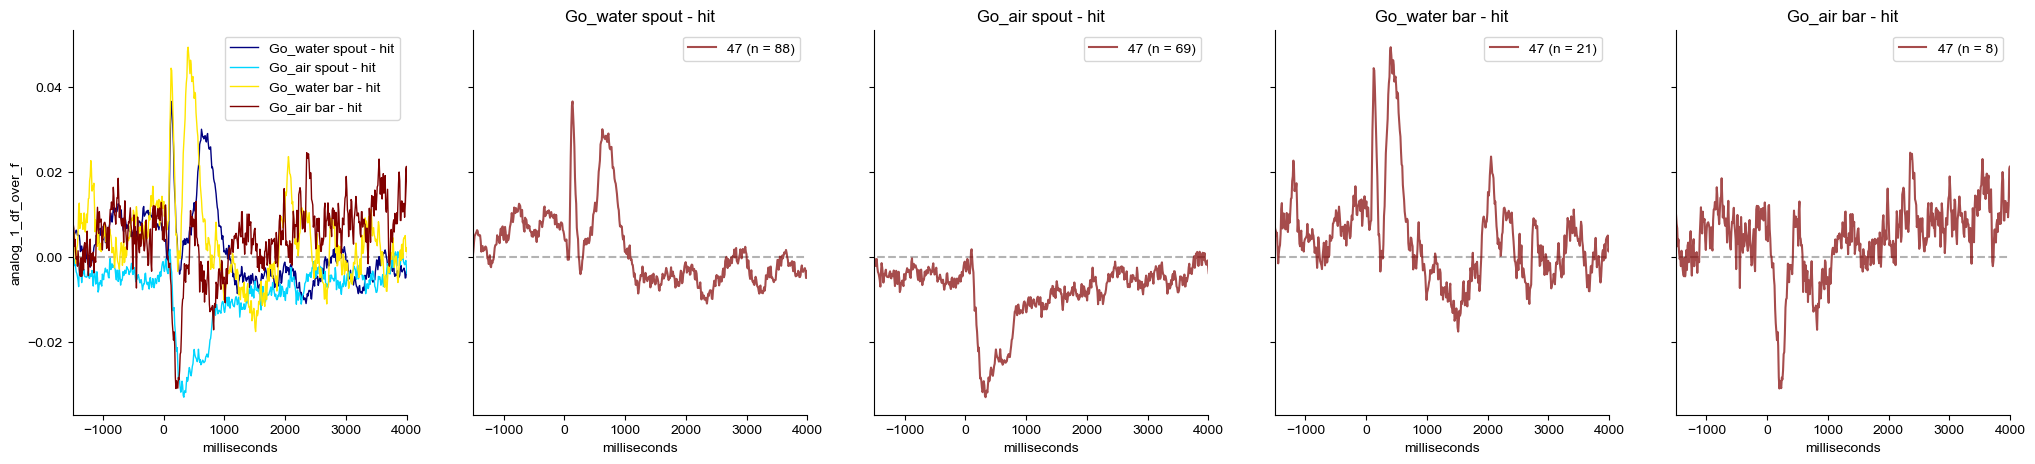

In [32]:
# if this was not set at creation
# cont_dataset.set_trial_window([-2, 6], 's')

cont_dataset.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-1500, 4000],
    time_unit = 'milliseconds',
    ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (25, 5),
    dpi = 100,
    verbose = True)

# Return a count of overall number of trials
cont_dataset.metadata_df['keep'].value_counts()



In [21]:
from copy import deepcopy
exp_cohort_subset = deepcopy(exp_cohort)

# Take only sessions where the task is 'reaching_go_nogo' and which have matching photometry files
exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'go_rewarding_aversive') 
    and (session.subject_ID == 47)
    and (session.photometry_rsync is not None)]

exp_cohort_subset.by_trial = True
exp_cohort_subset.trial_window = [-2000, 6000]
days = [session.number for session in  exp_cohort_subset.sessions]

[2, 3, 4, 5, 6, 7, 8, 9]

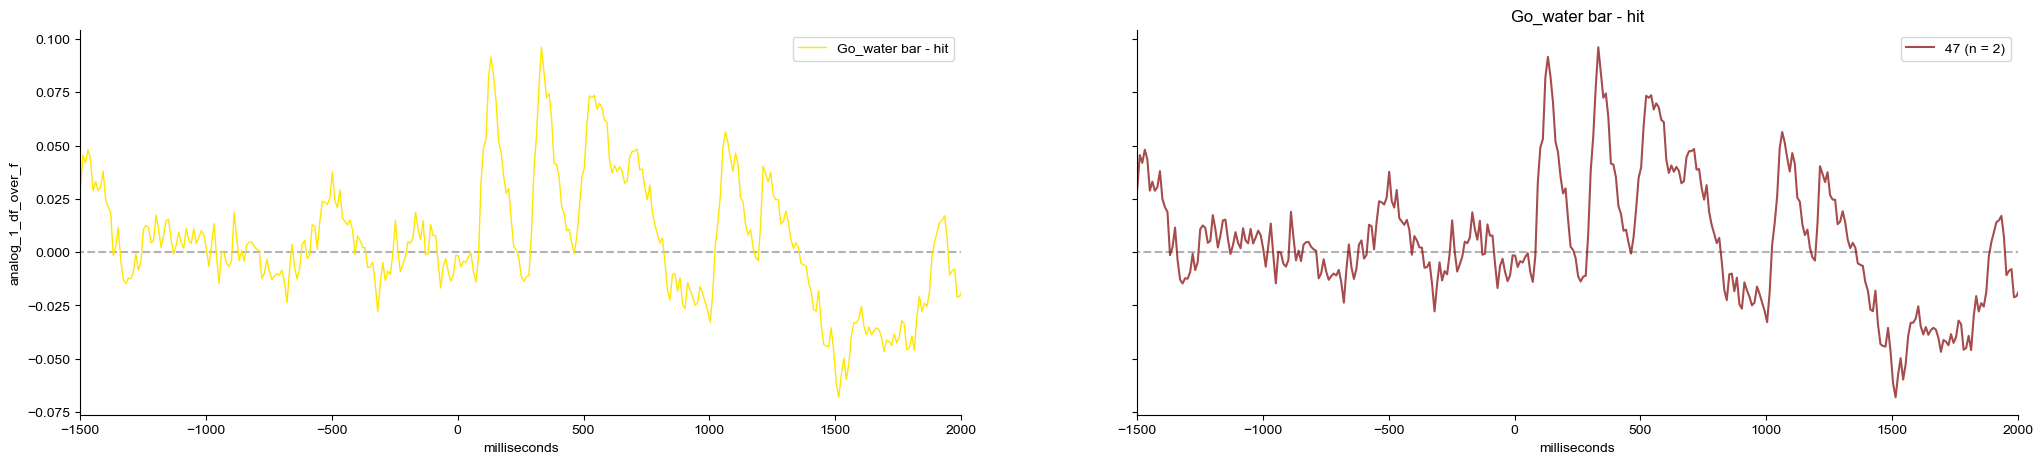

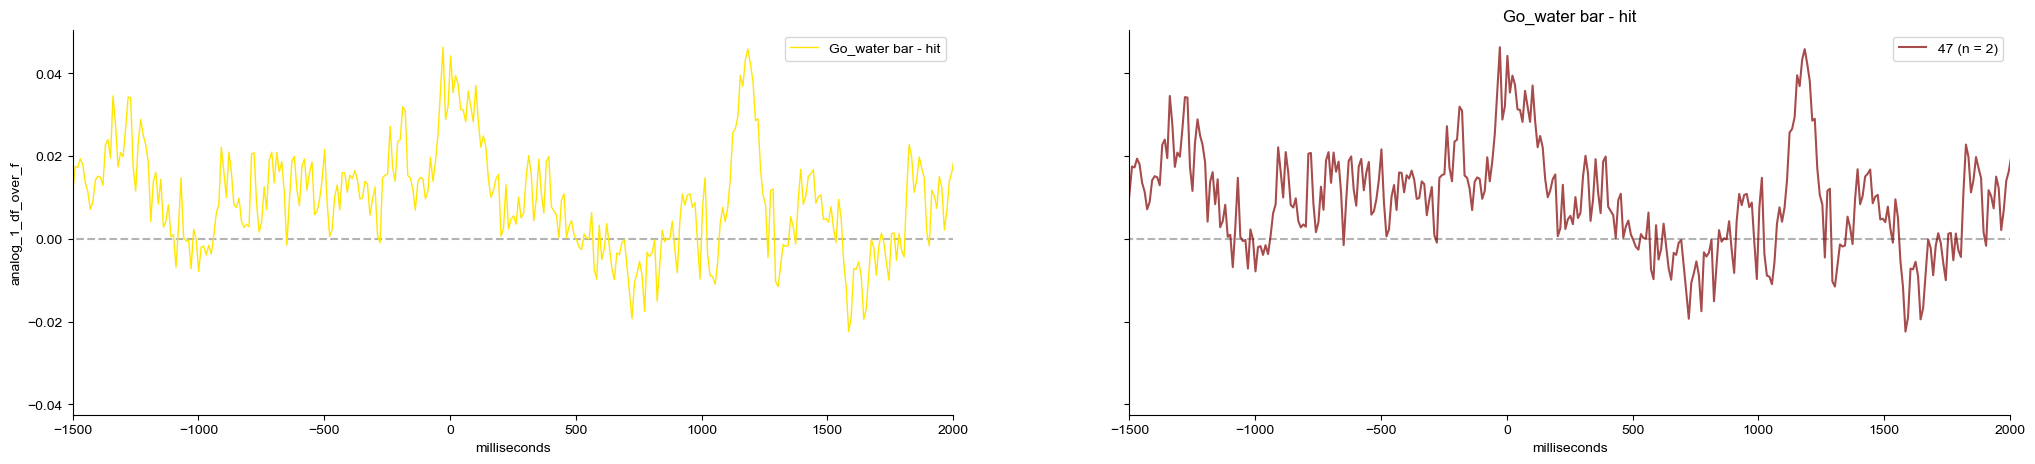

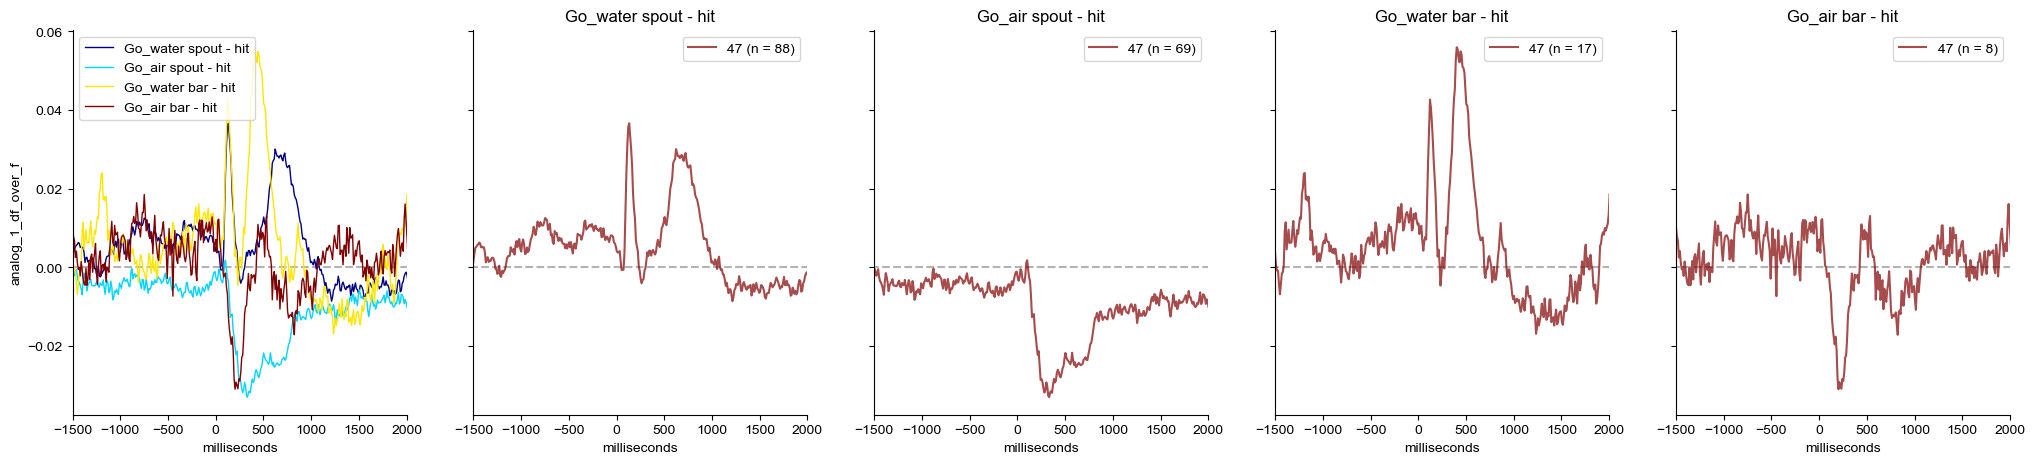

In [37]:
from copy import deepcopy
exp_cohort_subset = deepcopy(exp_cohort)

# Take only sessions where the task is 'reaching_go_nogo' and which have matching photometry files
exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'go_rewarding_aversive') 
    and (session.subject_ID == 47)
    and (session.photometry_rsync is not None)]

exp_cohort_subset.by_trial = True
exp_cohort_subset.trial_window = [-2000, 6000]
days = [session.number for session in  exp_cohort_subset.sessions]

days = [session.number for session in  exp_cohort_subset.sessions]

for day in days:

    exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'go_rewarding_aversive') 
    and (session.subject_ID == 47)
    and (session.number == day)
    ]

    cont_dataset = exp_cohort_subset.get_photometry_groups(
    groups = None, # or use groups variable defined above
    conditions_list = condition_list, 
    cond_aliases = cond_aliases, 
    when = 'all', 
    task_names = 'go_rewarding_aversive', #'reaching_go_nogo',
    trig_on_ev = None, # align to the first event of a kind e.g. bar_off
    high_pass = None, 
    low_pass = 45, 
    median_filt = 3,
    motion_corr = True, 
    df_over_f = True, 
    downsampling_factor = 10, 
    export_vars = ['analog_1_df_over_f'], 
    remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
    verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True

    cont_dataset.set_trial_window([-2000, 6000], 'ms')



    cont_dataset.filter_lastNsessions(n = 1)

    cont_dataset.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-1500, 2000],
    time_unit = 'milliseconds',
    ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (25, 5),
    dpi = 100,
    verbose = False)

# # Return a count of overall number of trials
# cont_dataset.metadata_df['keep'].value_counts()

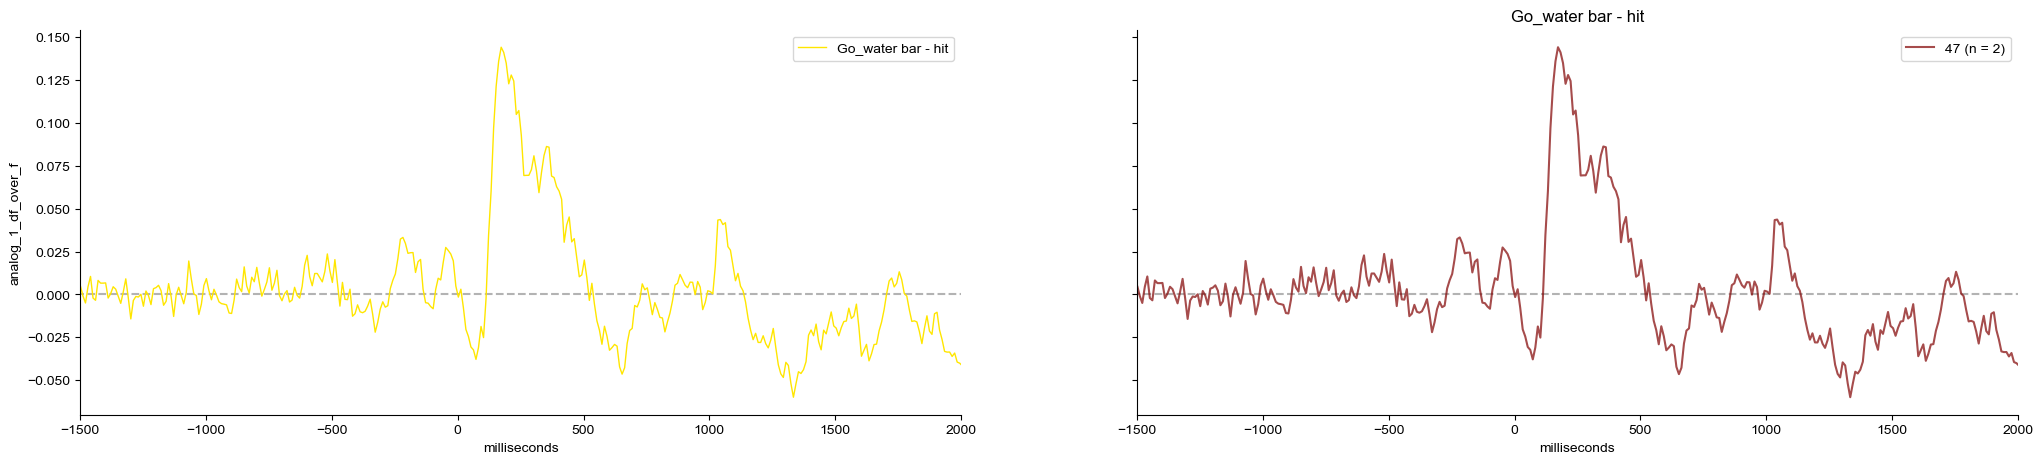

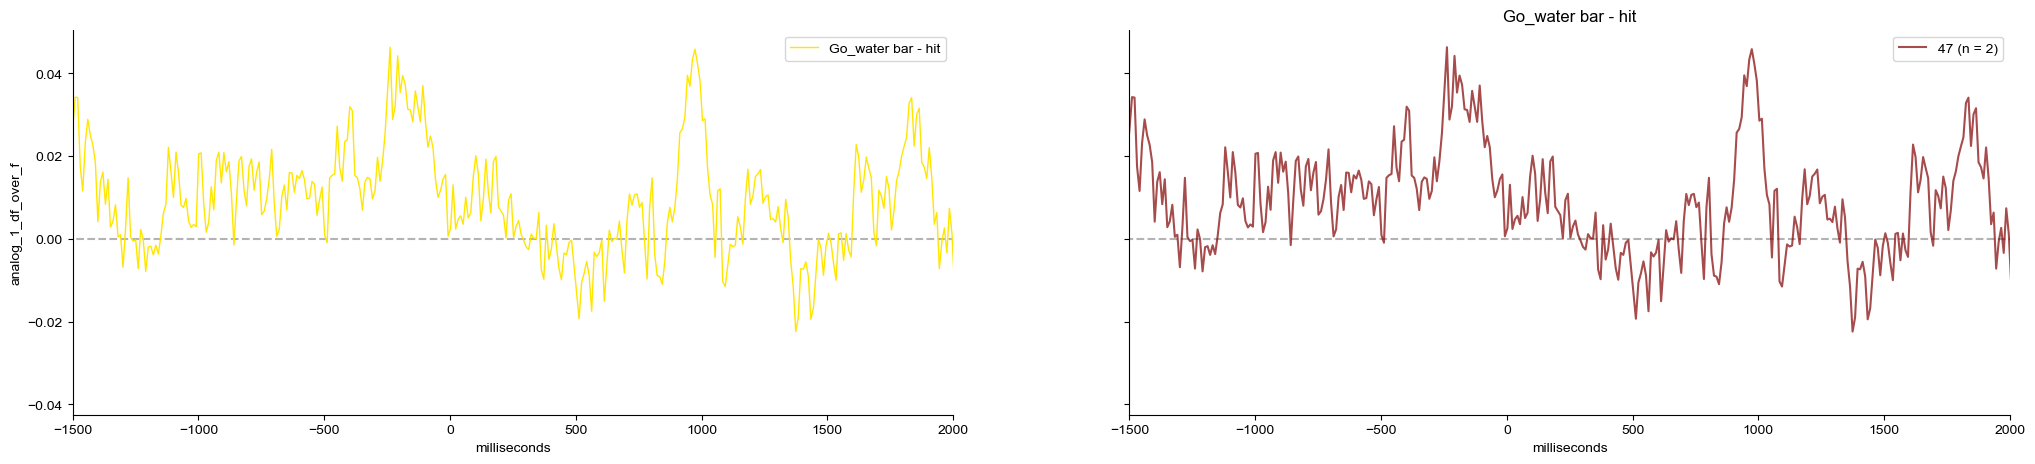

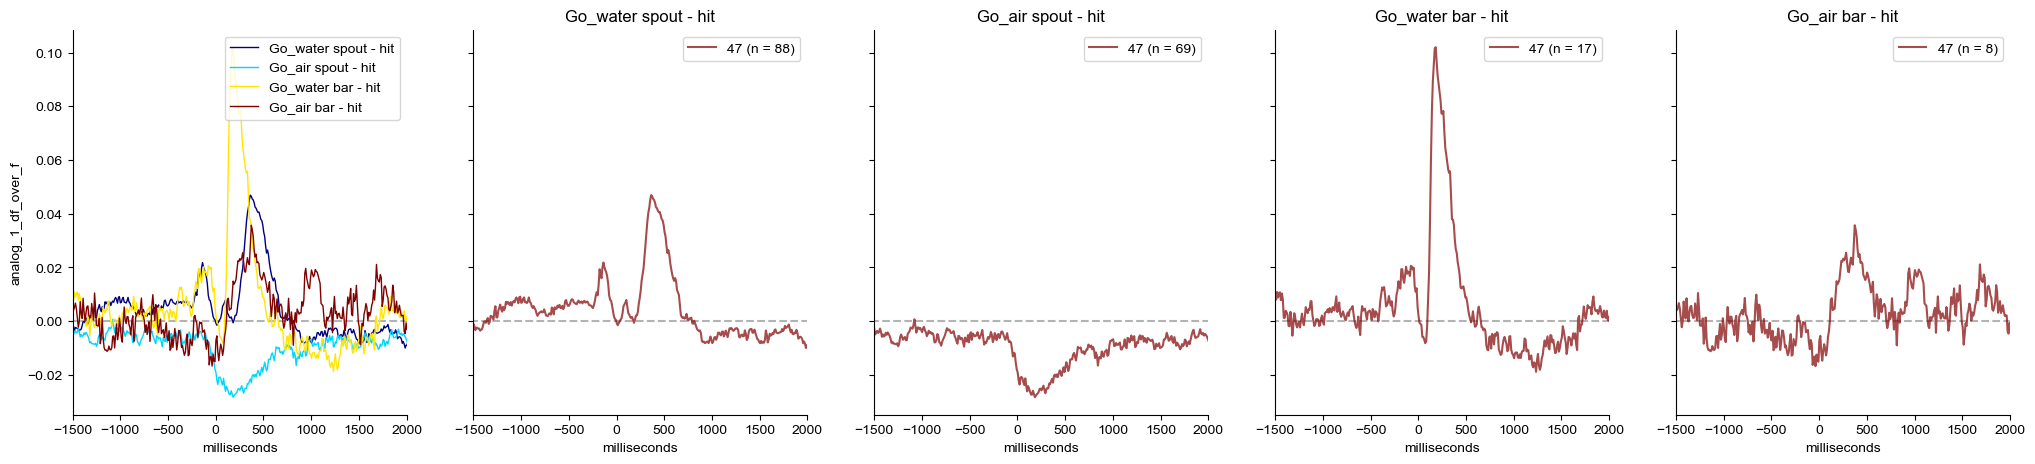

In [38]:
from copy import deepcopy
exp_cohort_subset = deepcopy(exp_cohort)

# Take only sessions where the task is 'reaching_go_nogo' and which have matching photometry files
exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'go_rewarding_aversive') 
    and (session.subject_ID == 47)
    and (session.photometry_rsync is not None)]

exp_cohort_subset.by_trial = True
exp_cohort_subset.trial_window = [-2000, 6000]
days = [session.number for session in  exp_cohort_subset.sessions]

days = [session.number for session in  exp_cohort_subset.sessions]

for day in days:

    exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'go_rewarding_aversive') 
    and (session.subject_ID == 47)
    and (session.number == day)
    ]

    cont_dataset = exp_cohort_subset.get_photometry_groups(
    groups = None, # or use groups variable defined above
    conditions_list = condition_list, 
    cond_aliases = cond_aliases, 
    when = 'all', 
    task_names = 'go_rewarding_aversive', #'reaching_go_nogo',
    trig_on_ev = 'bar_off', # align to the first event of a kind e.g. bar_off
    high_pass = None, 
    low_pass = 45, 
    median_filt = 3,
    motion_corr = True, 
    df_over_f = True, 
    downsampling_factor = 10, 
    export_vars = ['analog_1_df_over_f'], 
    remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
    verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True

    cont_dataset.set_trial_window([-2000, 6000], 'ms')



    cont_dataset.filter_lastNsessions(n = 1)

    cont_dataset.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-1500, 2000],
    time_unit = 'milliseconds',
    ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (25, 5),
    dpi = 100,
    verbose = False)

# # Return a count of overall number of trials
# cont_dataset.metadata_df['keep'].value_counts()

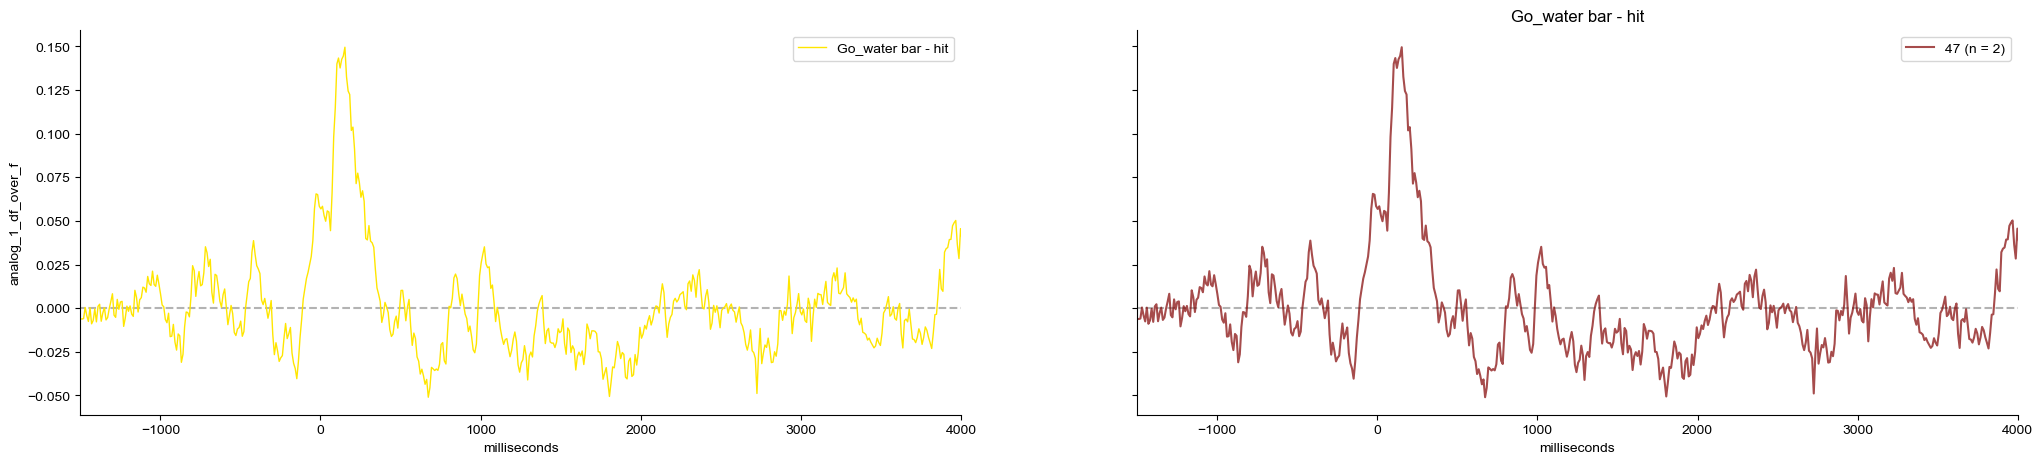

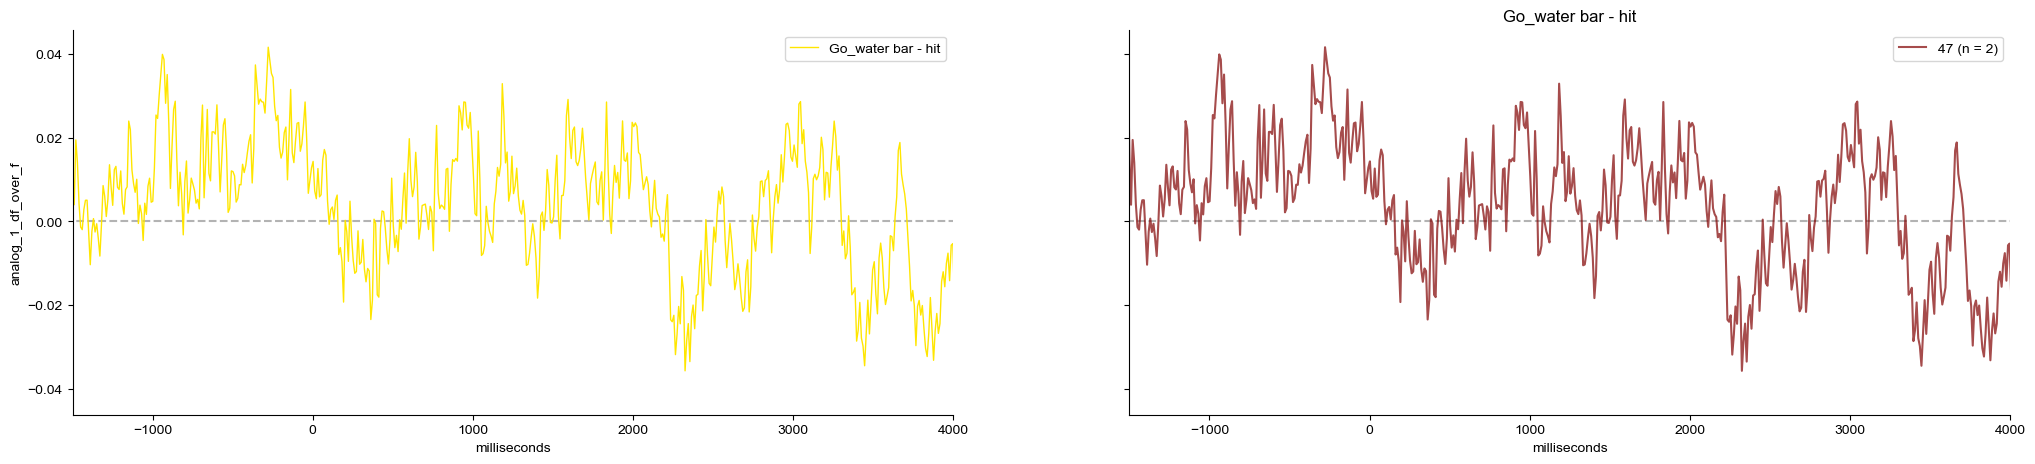

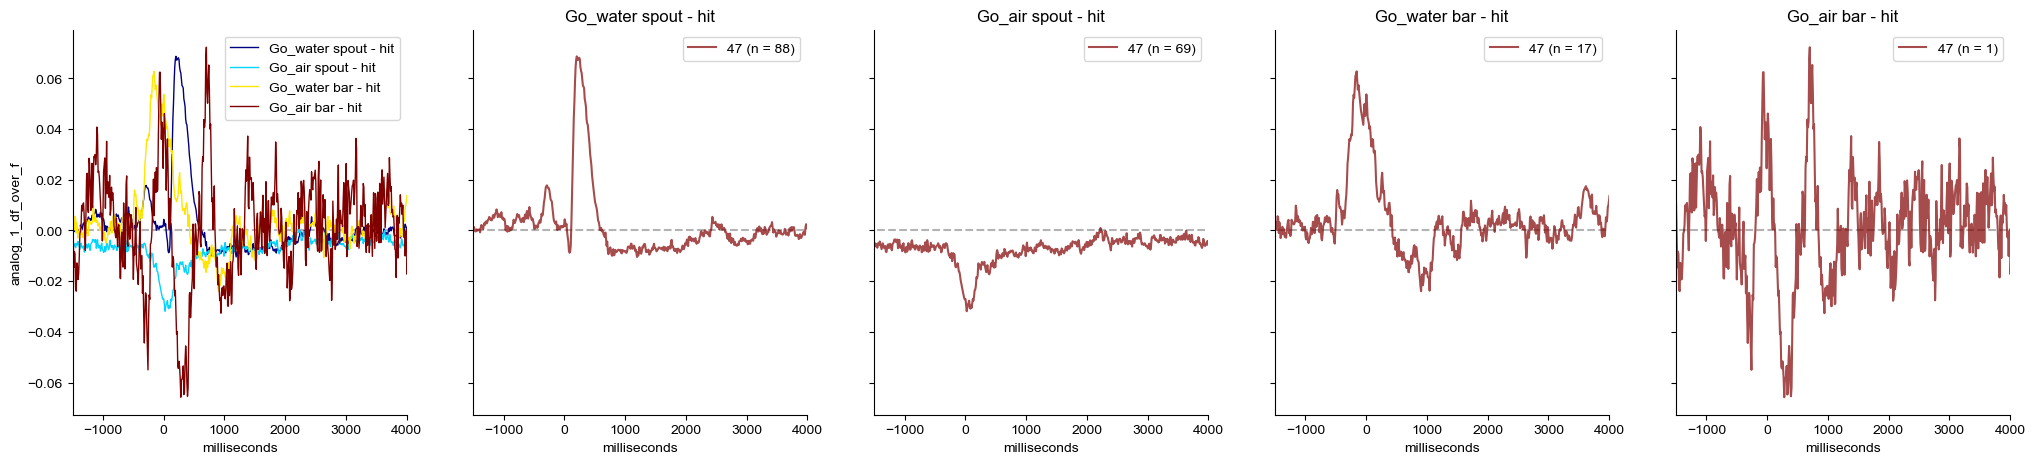

In [39]:
from copy import deepcopy
exp_cohort_subset = deepcopy(exp_cohort)

# Take only sessions where the task is 'reaching_go_nogo' and which have matching photometry files
exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'go_rewarding_aversive') 
    and (session.subject_ID == 47)
    and (session.photometry_rsync is not None)]

exp_cohort_subset.by_trial = True
exp_cohort_subset.trial_window = [-2000, 6000]
days = [session.number for session in  exp_cohort_subset.sessions]

days = [session.number for session in  exp_cohort_subset.sessions]

for day in days:

    exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'go_rewarding_aversive') 
    and (session.subject_ID == 47)
    and (session.number == day)
    ]

    cont_dataset = exp_cohort_subset.get_photometry_groups(
    groups = None, # or use groups variable defined above
    conditions_list = condition_list, 
    cond_aliases = cond_aliases, 
    when = 'all', 
    task_names = 'go_rewarding_aversive', #'reaching_go_nogo',
    trig_on_ev = 'spout', # align to the first event of a kind e.g. bar_off
    high_pass = None, 
    low_pass = 45, 
    median_filt = 3,
    motion_corr = True, 
    df_over_f = True, 
    downsampling_factor = 10, 
    export_vars = ['analog_1_df_over_f'], 
    remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
    verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True

    cont_dataset.set_trial_window([-2000, 6000], 'ms')



    cont_dataset.filter_lastNsessions(n = 1)

    cont_dataset.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-1500, 4000],
    time_unit = 'milliseconds',
    ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (25, 5),
    dpi = 100,
    verbose = False)

# # Return a count of overall number of trials
# cont_dataset.metadata_df['keep'].value_counts()

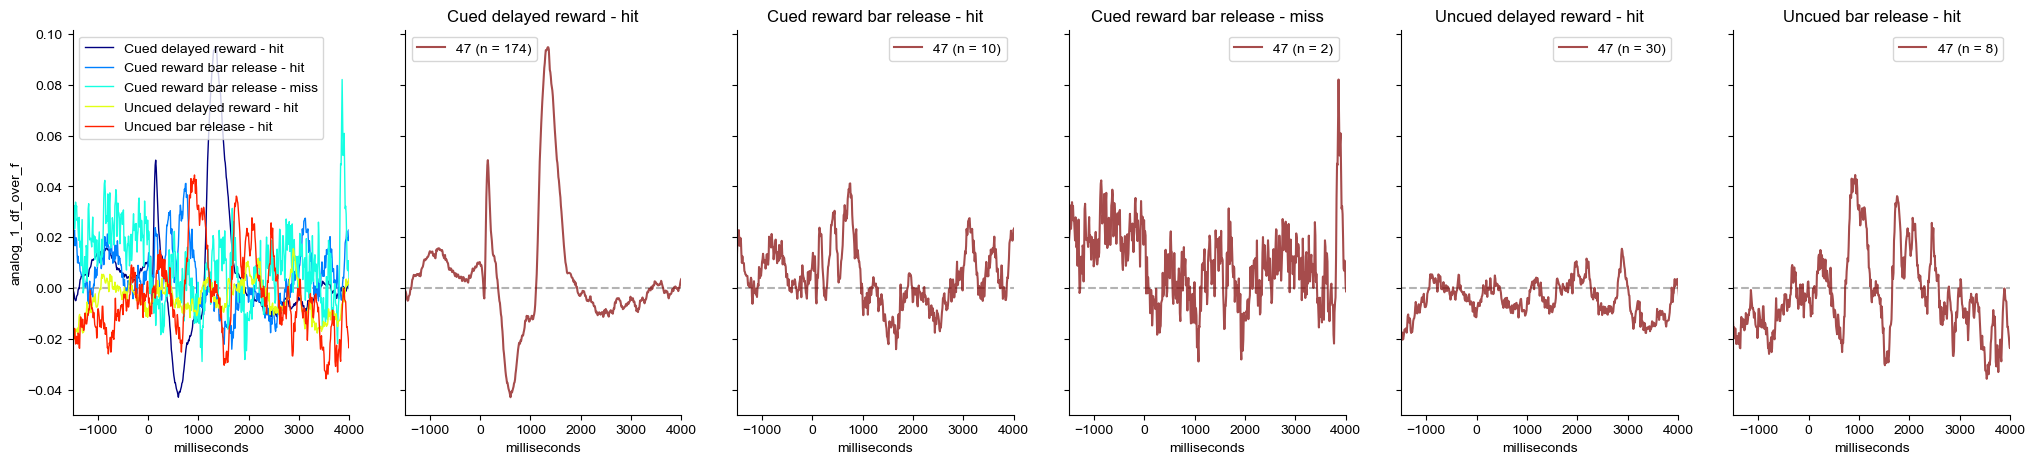

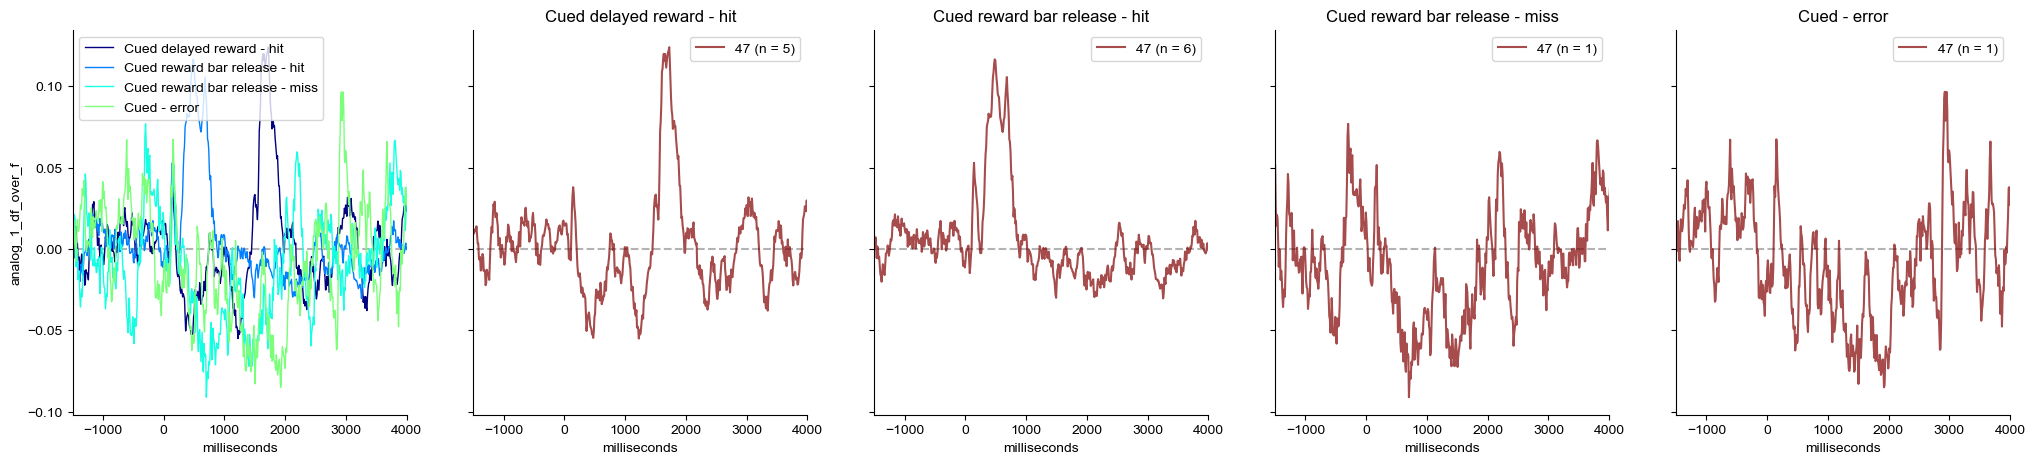

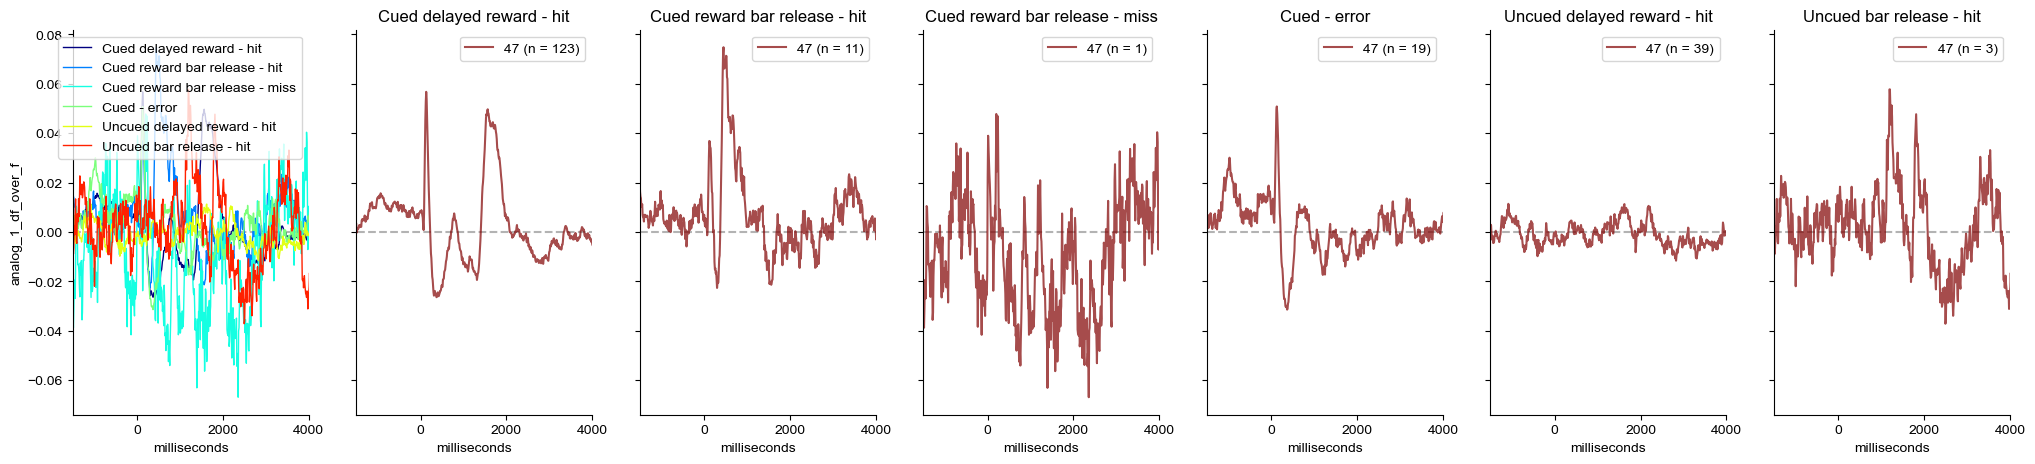

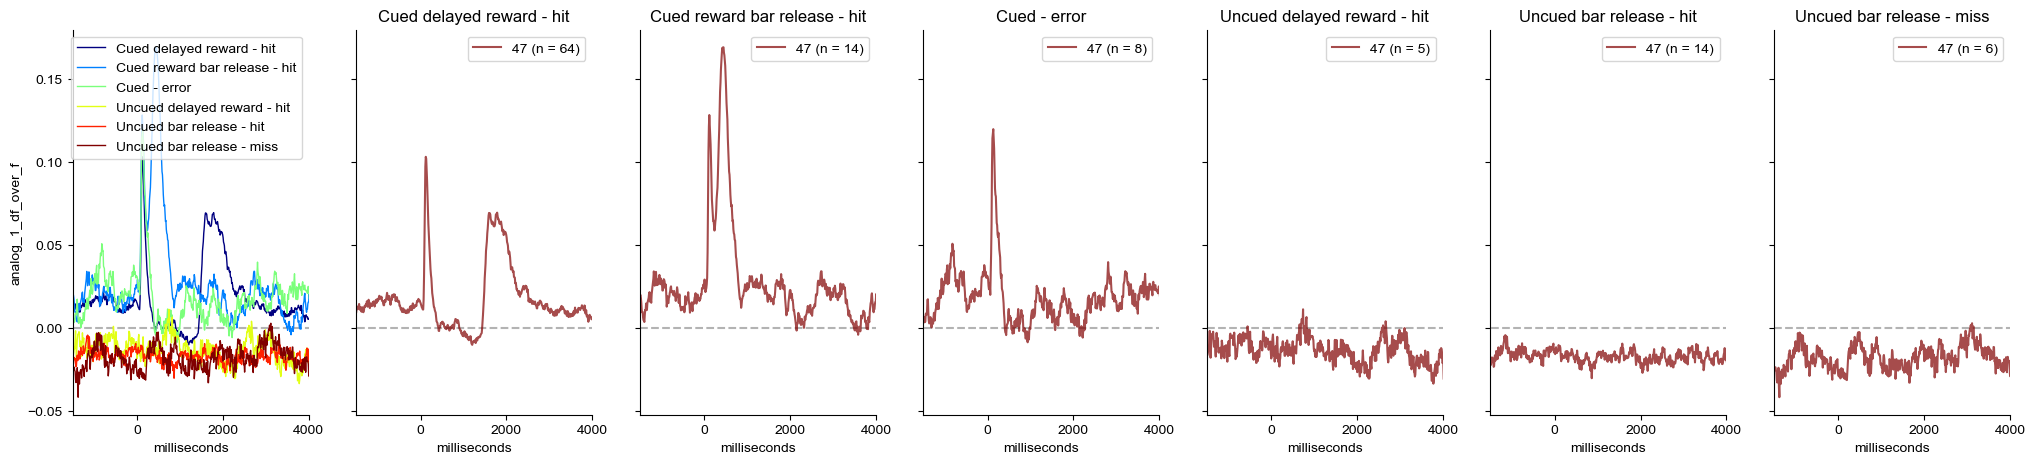

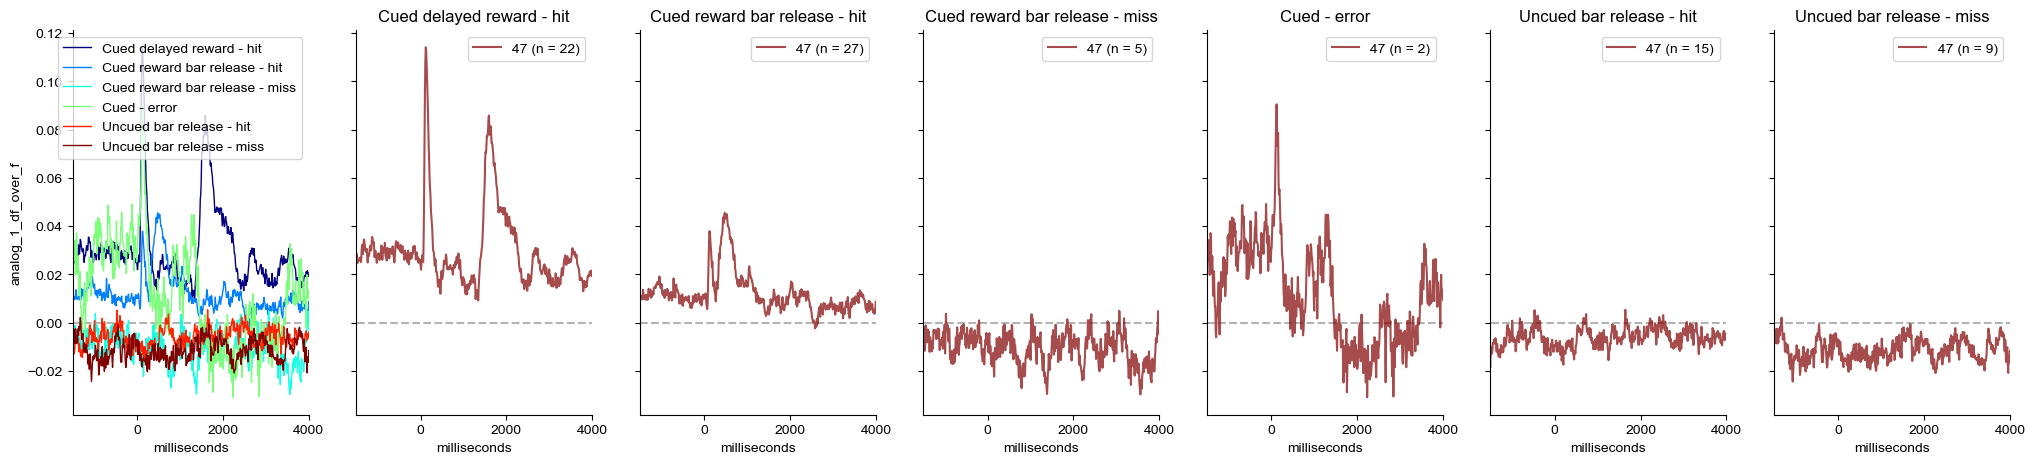

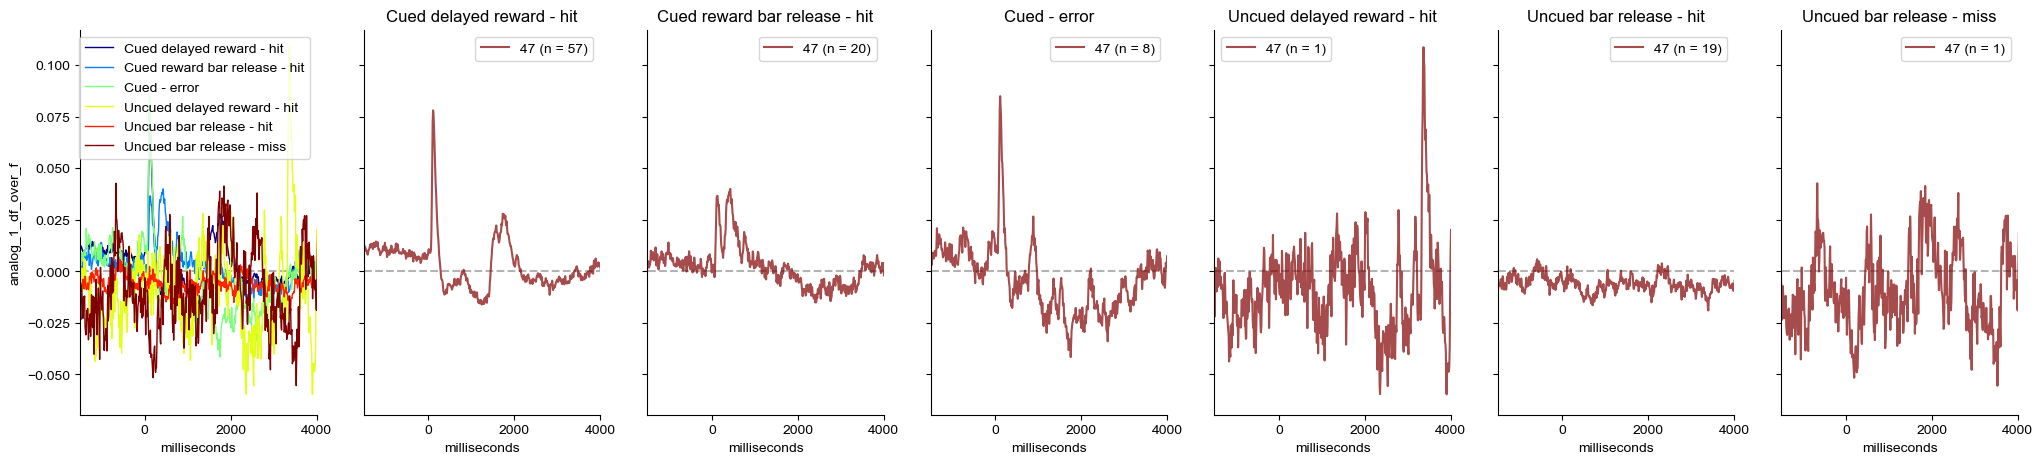

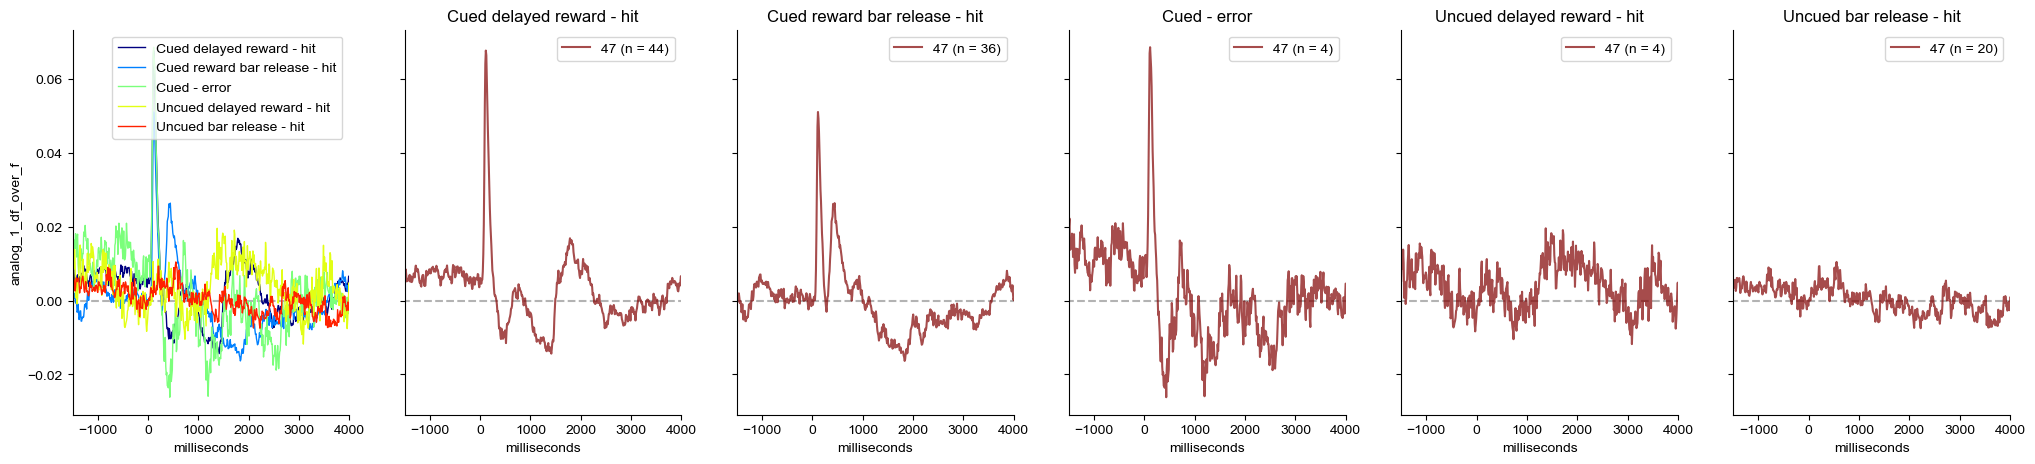

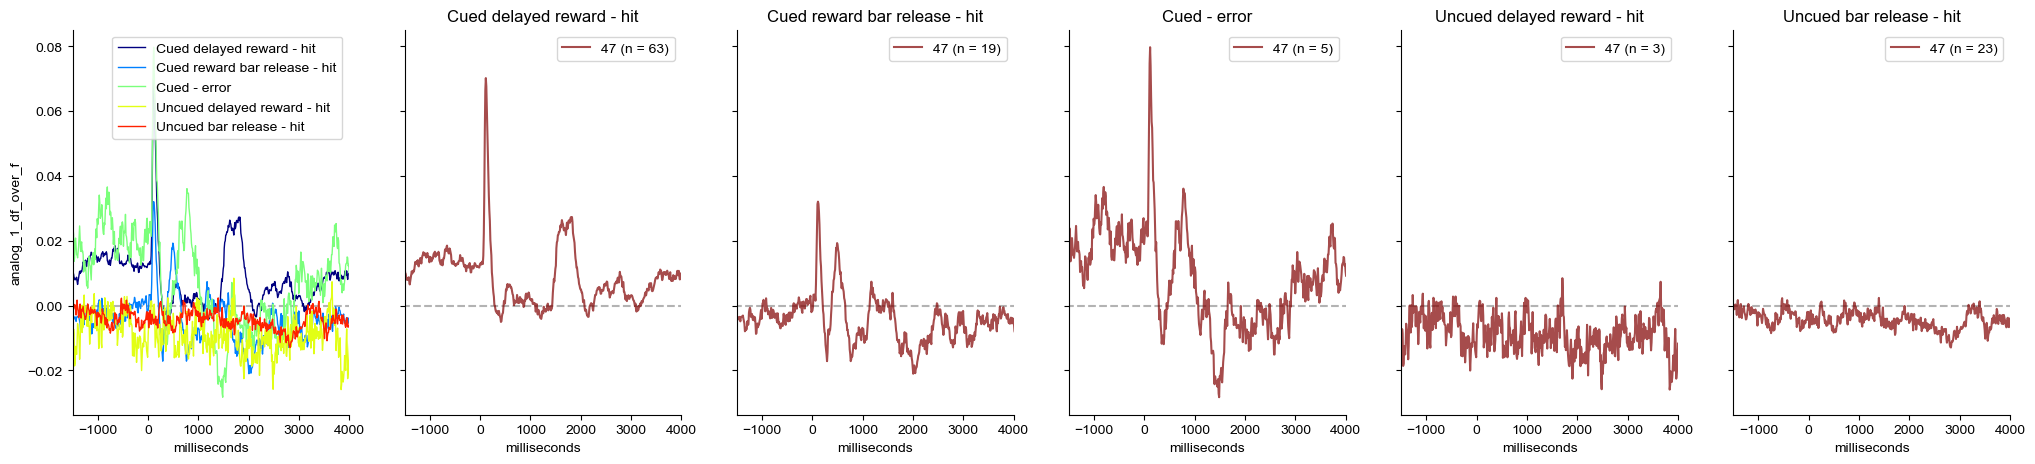

In [ ]:
from copy import deepcopy
exp_cohort_subset = deepcopy(exp_cohort)

# Take only sessions where the task is 'reaching_go_nogo' and which have matching photometry files
exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'cued_uncued_oct22') 
    and (session.subject_ID == 47)
    and (session.photometry_rsync is not None)]

exp_cohort_subset.by_trial = True
exp_cohort_subset.trial_window = [-2000, 6000]
days = [session.number for session in  exp_cohort_subset.sessions]

days = [session.number for session in  exp_cohort_subset.sessions]

for day in days:

    exp_cohort_subset.sessions = [session for session in exp_cohort.sessions if (
    session.task_name == 'cued_uncued_oct22') 
    and (session.subject_ID == 47)
    and (session.number == day)
    ]

    cont_dataset = exp_cohort_subset.get_photometry_groups(
    groups = None, # or use groups variable defined above
    conditions_list = condition_list, 
    cond_aliases = cond_aliases, 
    when = 'all', 
    task_names = 'cued_uncued_oct22', #'reaching_go_nogo',
    trig_on_ev = None, # align to the first event of a kind e.g. bar_off
    high_pass = None, 
    low_pass = 45, 
    median_filt = 3,
    motion_corr = True, 
    df_over_f = True, 
    downsampling_factor = 10, 
    export_vars = ['analog_1_df_over_f'], 
    remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
    verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True

    cont_dataset.set_trial_window([-2000, 6000], 'ms')



    cont_dataset.filter_lastNsessions(n = 1)

    cont_dataset.lineplot(
    vars = ['analog_1_df_over_f'],
    time_lim = [-1500, 4000],
    time_unit = 'milliseconds',
    ylim =  None,# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    error = True,
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (25, 5),
    dpi = 100,
    verbose = False)

# # Return a count of overall number of trials
# cont_dataset.metadata_df['keep'].value_counts()

In [33]:
[session.datetime for session in exp_cohort.sessions if (
    session.task_name == 'cued_uncued_oct22') 
    and (session.subject_ID == 47)
    and (session.photometry_rsync is not None)]

[datetime.datetime(2022, 10, 10, 15, 56, 38),
 datetime.datetime(2022, 10, 11, 10, 19, 42),
 datetime.datetime(2022, 10, 11, 10, 25, 41),
 datetime.datetime(2022, 10, 14, 11, 36, 41),
 datetime.datetime(2022, 10, 17, 10, 12, 41),
 datetime.datetime(2022, 10, 18, 11, 1, 58),
 datetime.datetime(2022, 10, 19, 11, 8, 43),
 datetime.datetime(2022, 10, 20, 10, 34, 43)]